investigating the Ames Housing Dataset: https://www.kaggle.com/datasets/marcopale/housing


In [1]:
import polars as pl
import xgboost as xgb
import seaborn as sns
import shap
import polars.selectors as cs
from sklearn.model_selection import train_test_split
import hvplot.polars
import numpy as np

In [2]:
df = pl.read_csv('ames_housing/AmesHousing.csv')
X = df.select(cs.numeric() - cs.first()-cs.last()).to_pandas()
y = df['SalePrice']

histogram of sales price

In [3]:
df.hvplot.hist('SalePrice')

:Histogram   [SalePrice]   (Count)

In [4]:
df.hvplot.hist('Gr Liv Area')

:Histogram   [Gr Liv Area]   (Count)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
labels = list(df.columns)
Xd = xgb.DMatrix(X)


In [7]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
model.score(X_test,y_test)

0.920837938785553

In [9]:
ypred = model.predict(X_test)
np.mean(ypred)

np.float32(179617.33)

In [10]:
explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

shap_values = explanation.values
np.abs(shap_values.sum(axis=1) + explanation.base_values - ypred).max()

np.float32(0.1875)

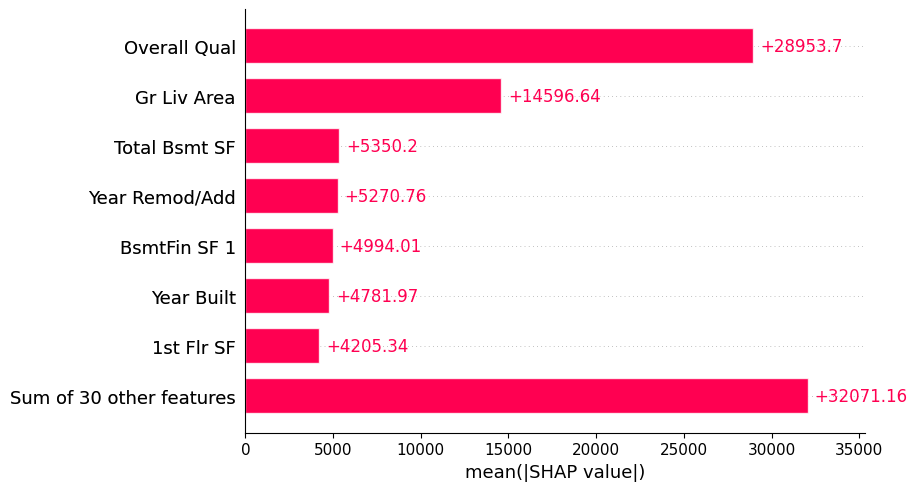

In [11]:
shap.plots.bar(explanation, max_display=8)

In [22]:
shap.plots.embedding('Overall Qual', shap_values=shap_values, method='pca')

ValueError: Could not find feature named: Overall Qual

In [ ]:
# i want to only include the top five features
df2 = df.select((cs.numeric() & cs.by_name('Overall Qual', 'Gr Liv Area', 
                                       'Total Bsmt SF', 'Year Remod/Add', 
                                       'Bsmt SF1', 'Year Built', '1st Flr SF',
                                       'SalePrice')))
X2 = df2.select(pl.col("*").exclude('SalePrice')).to_pandas()
y2 = df2.select(pl.col('SalePrice')).to_pandas()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20)

In [ ]:
model2 = xgb.XGBRegressor()
model2.fit(X_train2, y_train2)
explainer2 = shap.TreeExplainer(model2)
explain2 = explainer2(X_test2)

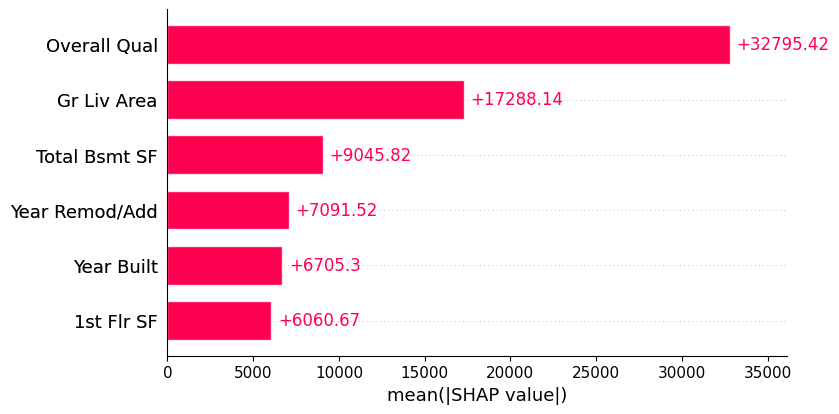

In [ ]:
shap.plots.bar(explain2)

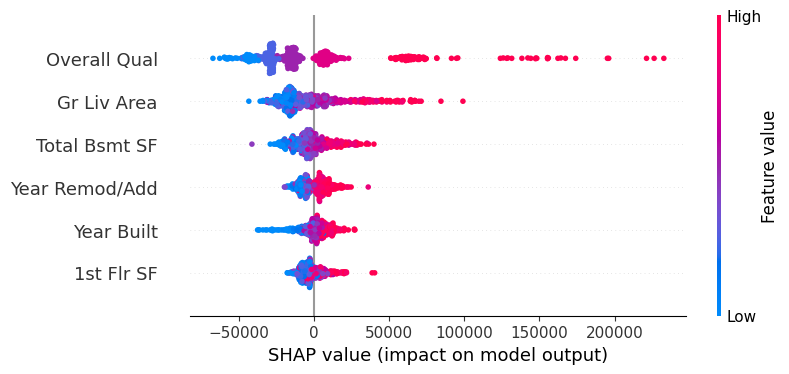

In [ ]:
shap.plots.beeswarm(explain2)

In [ ]:
len(X_test2)

586

In [ ]:
shap_interaction_values2 = explainer2.shap_interaction_values(X_test2)
shap_interaction_values2[0]

array([[-2.2334156e+04,  1.4579126e+03,  7.8703479e+02,  2.3400432e+03,
         2.3522969e+03,  3.5294001e+03],
       [ 1.4579131e+03, -1.7212473e+03,  1.3177490e+03, -1.6475433e+01,
         1.0312223e+03, -2.9327875e+02],
       [ 7.8703516e+02,  1.3177480e+03, -9.1320059e+03,  7.4815491e+02,
         7.5358435e+02,  1.5323557e+03],
       [ 2.3400410e+03, -1.6476562e+01,  7.4815515e+02,  1.6877567e+03,
        -1.2908646e+03, -1.8925769e+03],
       [ 2.3522949e+03,  1.0312225e+03,  7.5358521e+02, -1.2908627e+03,
         4.8773135e+03, -3.0611538e+03],
       [ 3.5294036e+03, -2.9327844e+02,  1.5323583e+03, -1.8925753e+03,
        -3.0611550e+03, -1.8894036e+03]], dtype=float32)